In [1]:
#Dataset from https://archive.ics.uci.edu/dataset/2/adult - Cheers!

In [2]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
import zipfile
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
adult_df = pd.read_csv("adult.csv")

In [4]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
adult_df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


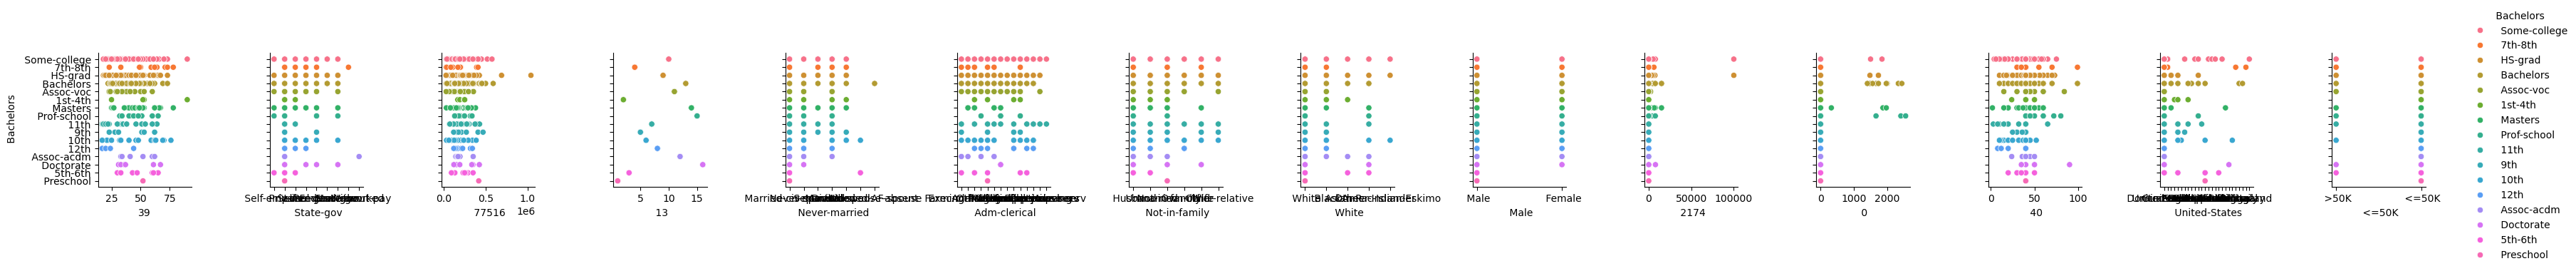

In [6]:
import seaborn as sns
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(adult_df)), size=500, replace=False)
sns.pairplot(
    data=adult_df.iloc[indices],
    y_vars=' Bachelors',
    x_vars=list(adult_df.drop(' Bachelors',axis=1).columns),
    hue=" Bachelors",
)
plt.show()

In [7]:
#Well that was useless

In [8]:
print(adult_df.columns)

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')


In [9]:
#Random names having a space in them is very silly

In [10]:
print(adult_df.describe())

                 39         77516            13          2174             0  \
count  32560.000000  3.256000e+04  32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05     10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05      2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05     12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

                 40  
count  32560.000000  
mean      40.437469  
std       12.347618  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  


In [11]:
print(adult_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [12]:
print(adult_df[' <=50K'].value_counts())

 <=50K
<=50K    24719
>50K      7841
Name: count, dtype: int64


In [13]:
print(adult_df.columns)

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')


In [14]:
print(adult_df[' 40'].value_counts())

 40
40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: count, Length: 94, dtype: int64


In [15]:
adult_df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
print(adult_df[' <=50K'].value_counts())

 <=50K
<=50K    24719
>50K      7841
Name: count, dtype: int64


In [17]:
#Logistic Regression to predict income

In [18]:
adult_df.columns = adult_df.columns.str.strip()

adult_df_encoded = pd.get_dummies(adult_df, drop_first=True)

#print(adult_df_encoded.columns)

X = adult_df_encoded.drop(columns='<=50K_ >50K') #naming is kinda messed up just go with it
y = adult_df_encoded['<=50K_ >50K']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000)

logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.8431

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.93      0.90      4912
        True       0.73      0.57      0.64      1600

    accuracy                           0.84      6512
   macro avg       0.80      0.75      0.77      6512
weighted avg       0.84      0.84      0.84      6512


Confusion Matrix:
[[4585  327]
 [ 695  905]]


C:\Users\jcfro\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#I'll take 84%

In [20]:
coefficients = logreg_model.coef_[0]

features = adult_df_encoded.drop(columns='<=50K_ >50K').columns

feature_weights = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

feature_weights['Abs_Coefficient'] = feature_weights['Coefficient'].abs()
feature_weights = feature_weights.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_weights)

                              Feature   Coefficient  Abs_Coefficient
32       Never-married_ Never-married -1.503010e+00     1.503010e+00
51           Not-in-family_ Own-child -1.184011e+00     1.184011e+00
30  Never-married_ Married-civ-spouse  1.042706e+00     1.042706e+00
38      Adm-clerical_ Exec-managerial  9.443522e-01     9.443522e-01
42        Adm-clerical_ Other-service -8.435087e-01     8.435087e-01
..                                ...           ...              ...
73  United-States_ Holand-Netherlands -1.123538e-03     1.123538e-03
4                                   0  7.152959e-04     7.152959e-04
3                                2174  3.197421e-04     3.197421e-04
63                United-States_ Cuba -2.366688e-04     2.366688e-04
1                               77516  7.803174e-07     7.803174e-07

[100 rows x 3 columns]


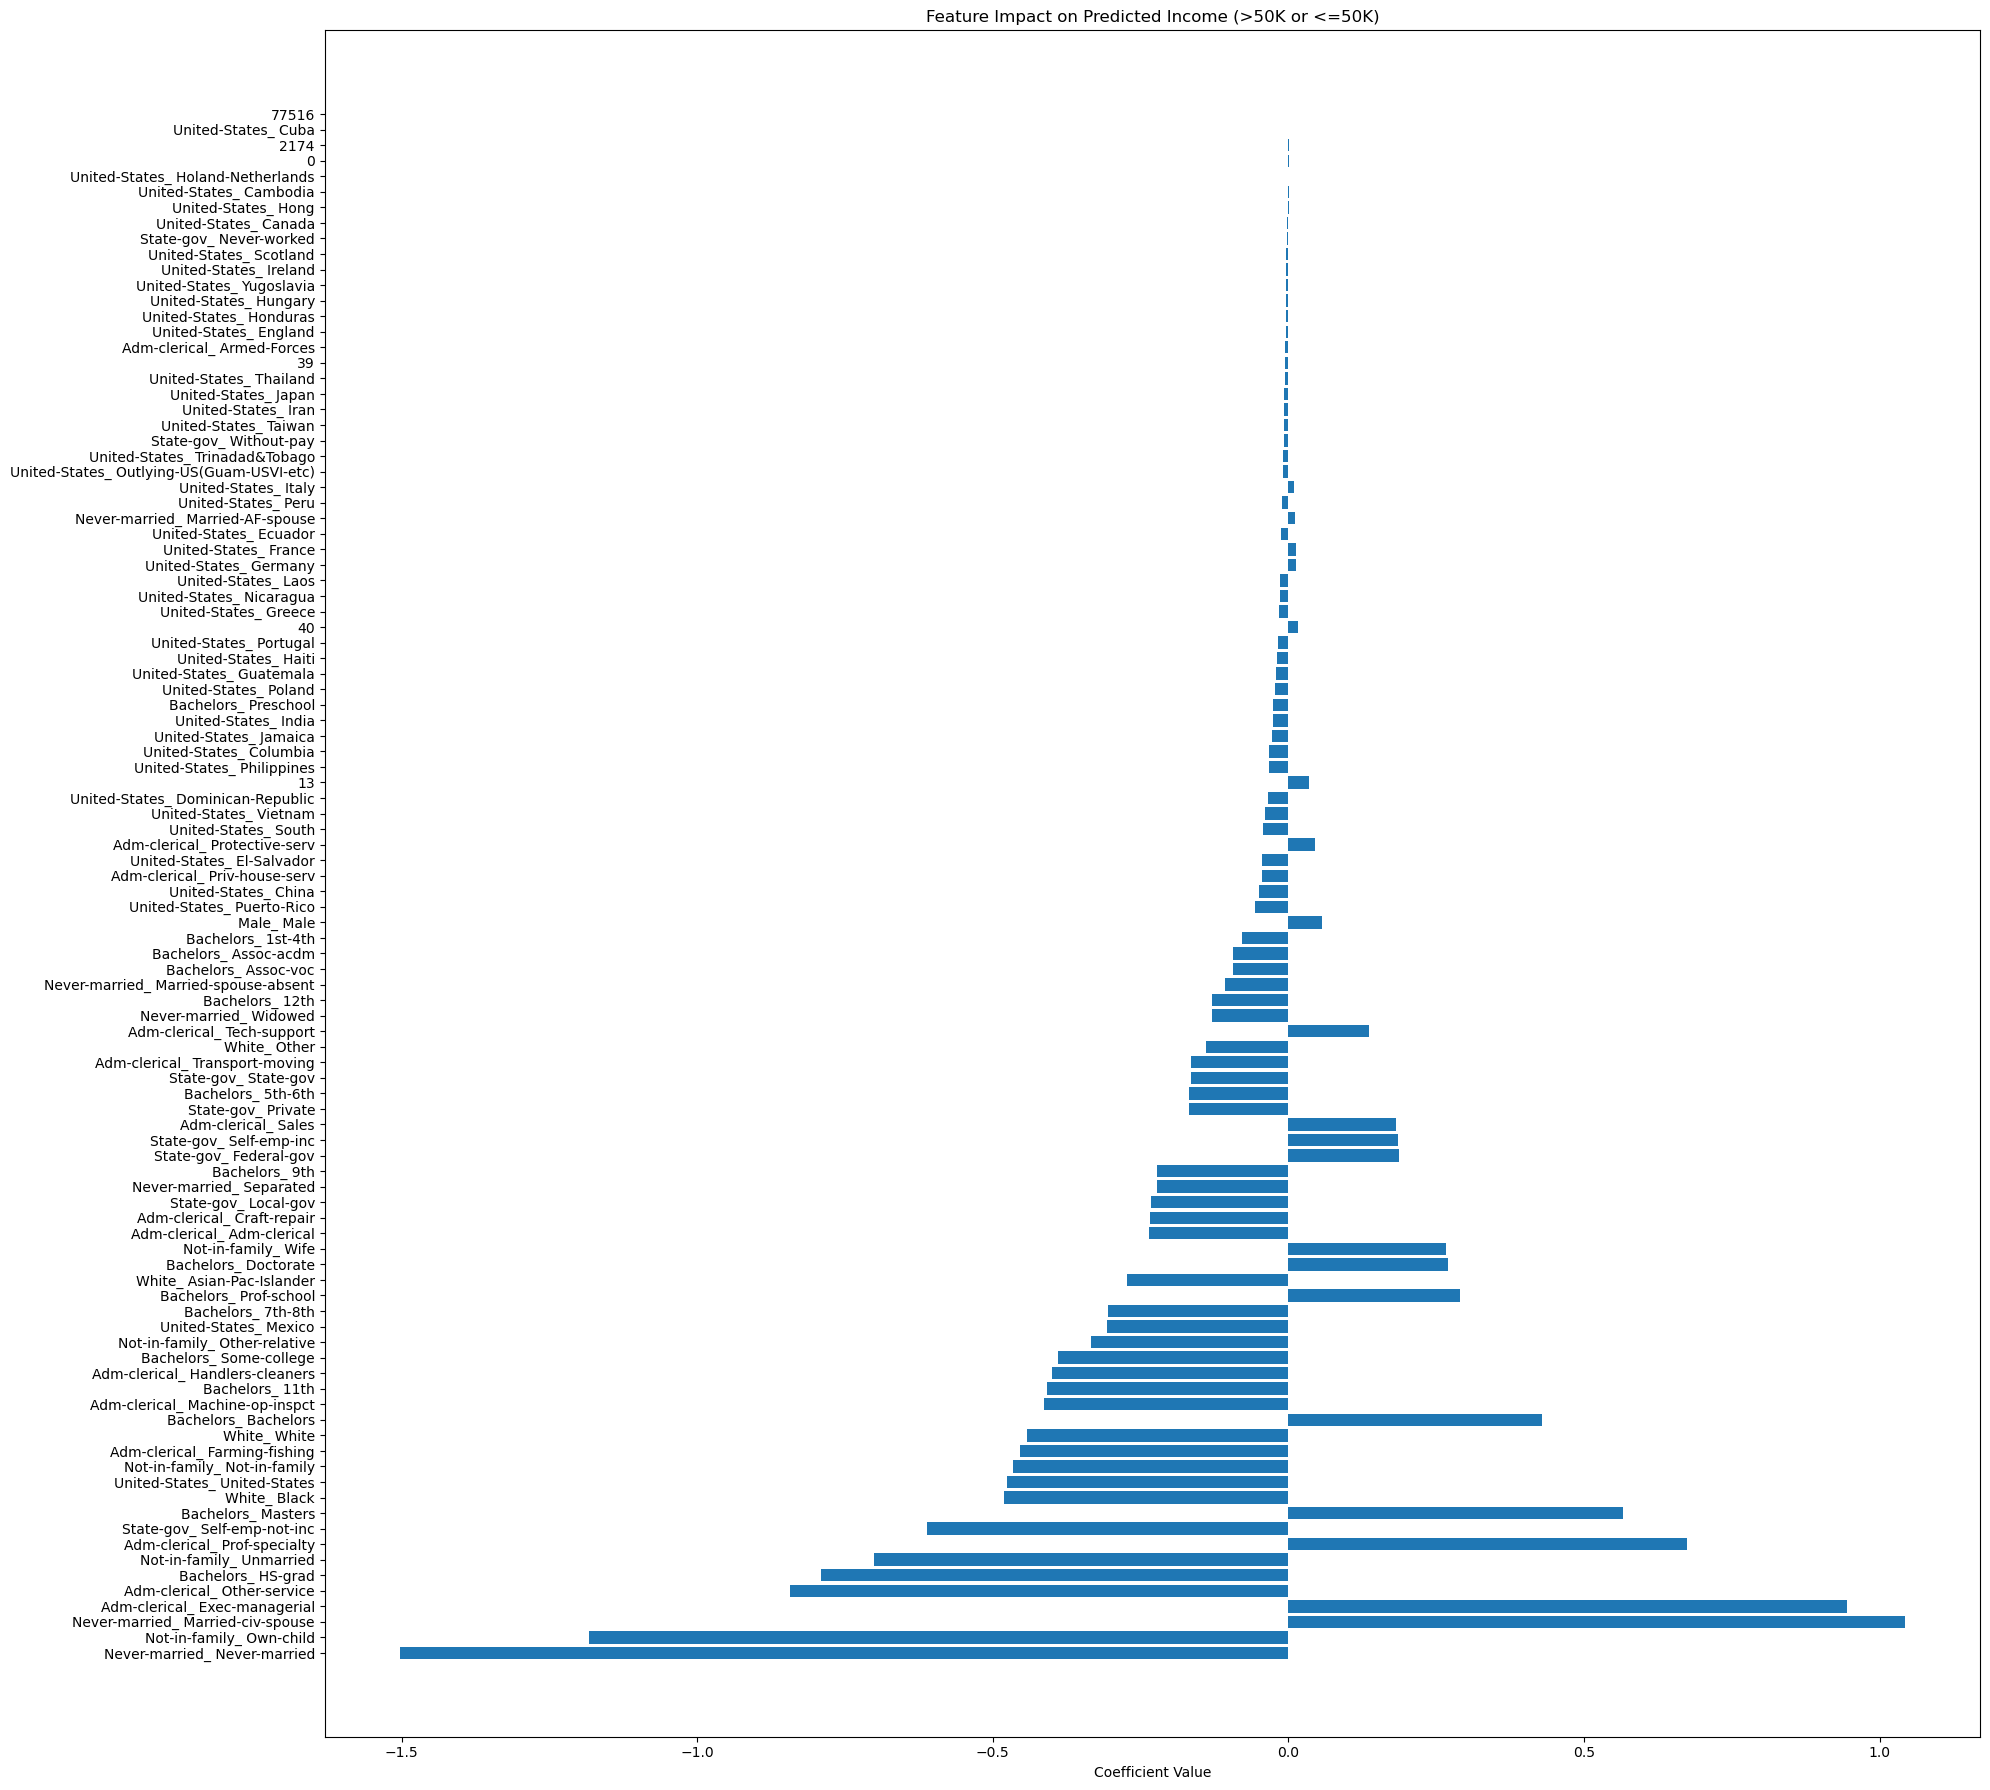

In [21]:
plt.figure(figsize=(20, 18)) #text is smaller but at least it isn't squished to hell

plt.barh(feature_weights['Feature'], feature_weights['Coefficient'])

plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Predicted Income (>50K or <=50K)')

plt.yticks(rotation=0)  

plt.tight_layout()
plt.show()

In [22]:
#damn, broke boys (or girls we don't discriminate) get no love </3
#Or maybe they're broke BECAUSE they get no love... No probably the former
#Exec manager being highest swing towards pos coefficient LMAO, those rats need to be stopped

In [23]:
print(adult_df.columns)

Index(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40',
       'United-States', '<=50K'],
      dtype='object')


In [24]:
print(adult_df['Not-in-family'].value_counts())

Not-in-family
Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64


In [25]:
#Raw Variable Table


#Variable Name	Role	Type	Demographic	Description	Units	Missing Values
#age	Feature	Integer	Age	N/A		no
#workclass	Feature	Categorical	Income	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.		yes
#fnlwgt	Feature	Integer				no
#education	Feature	Categorical	Education Level	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.		no
#education-num	Feature	Integer	Education Level			no
#marital-status	Feature	Categorical	Other	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.		no
#occupation	Feature	Categorical	Other	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.		yes
#relationship	Feature	Categorical	Other	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.		no
#race	Feature	Categorical	Race	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.		no
#sex	Feature	Binary	Sex	Female, Male.		no

In [26]:
print(adult_df['Adm-clerical'].value_counts())

Adm-clerical
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [27]:
print(adult_df['State-gov'].value_counts())

State-gov
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [28]:
#KNN to determine bachelors degree

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
adult_df_encoded = pd.get_dummies(adult_df, drop_first=True)

X = adult_df_encoded.drop(columns='Bachelors_ Bachelors')
y = adult_df_encoded['Bachelors_ Bachelors']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy}")

KNN Model Accuracy: 0.9596130221130221


In [31]:
#WE TAKE 95% 🦅🦅🦅🦅

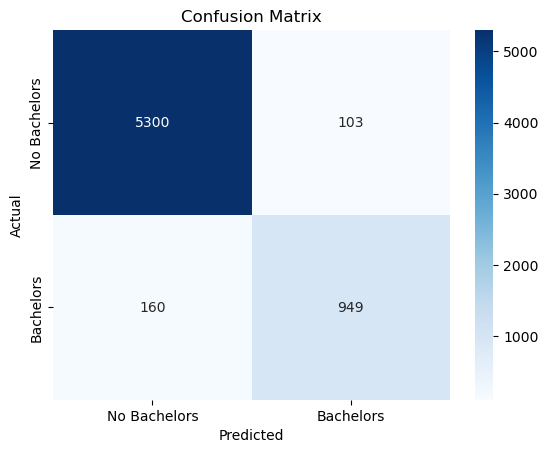

In [32]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Bachelors", "Bachelors"], yticklabels=["No Bachelors", "Bachelors"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
#Oh I expected it to be overfit to shit but that's not bad

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98      5403
        True       0.90      0.86      0.88      1109

    accuracy                           0.96      6512
   macro avg       0.94      0.92      0.93      6512
weighted avg       0.96      0.96      0.96      6512



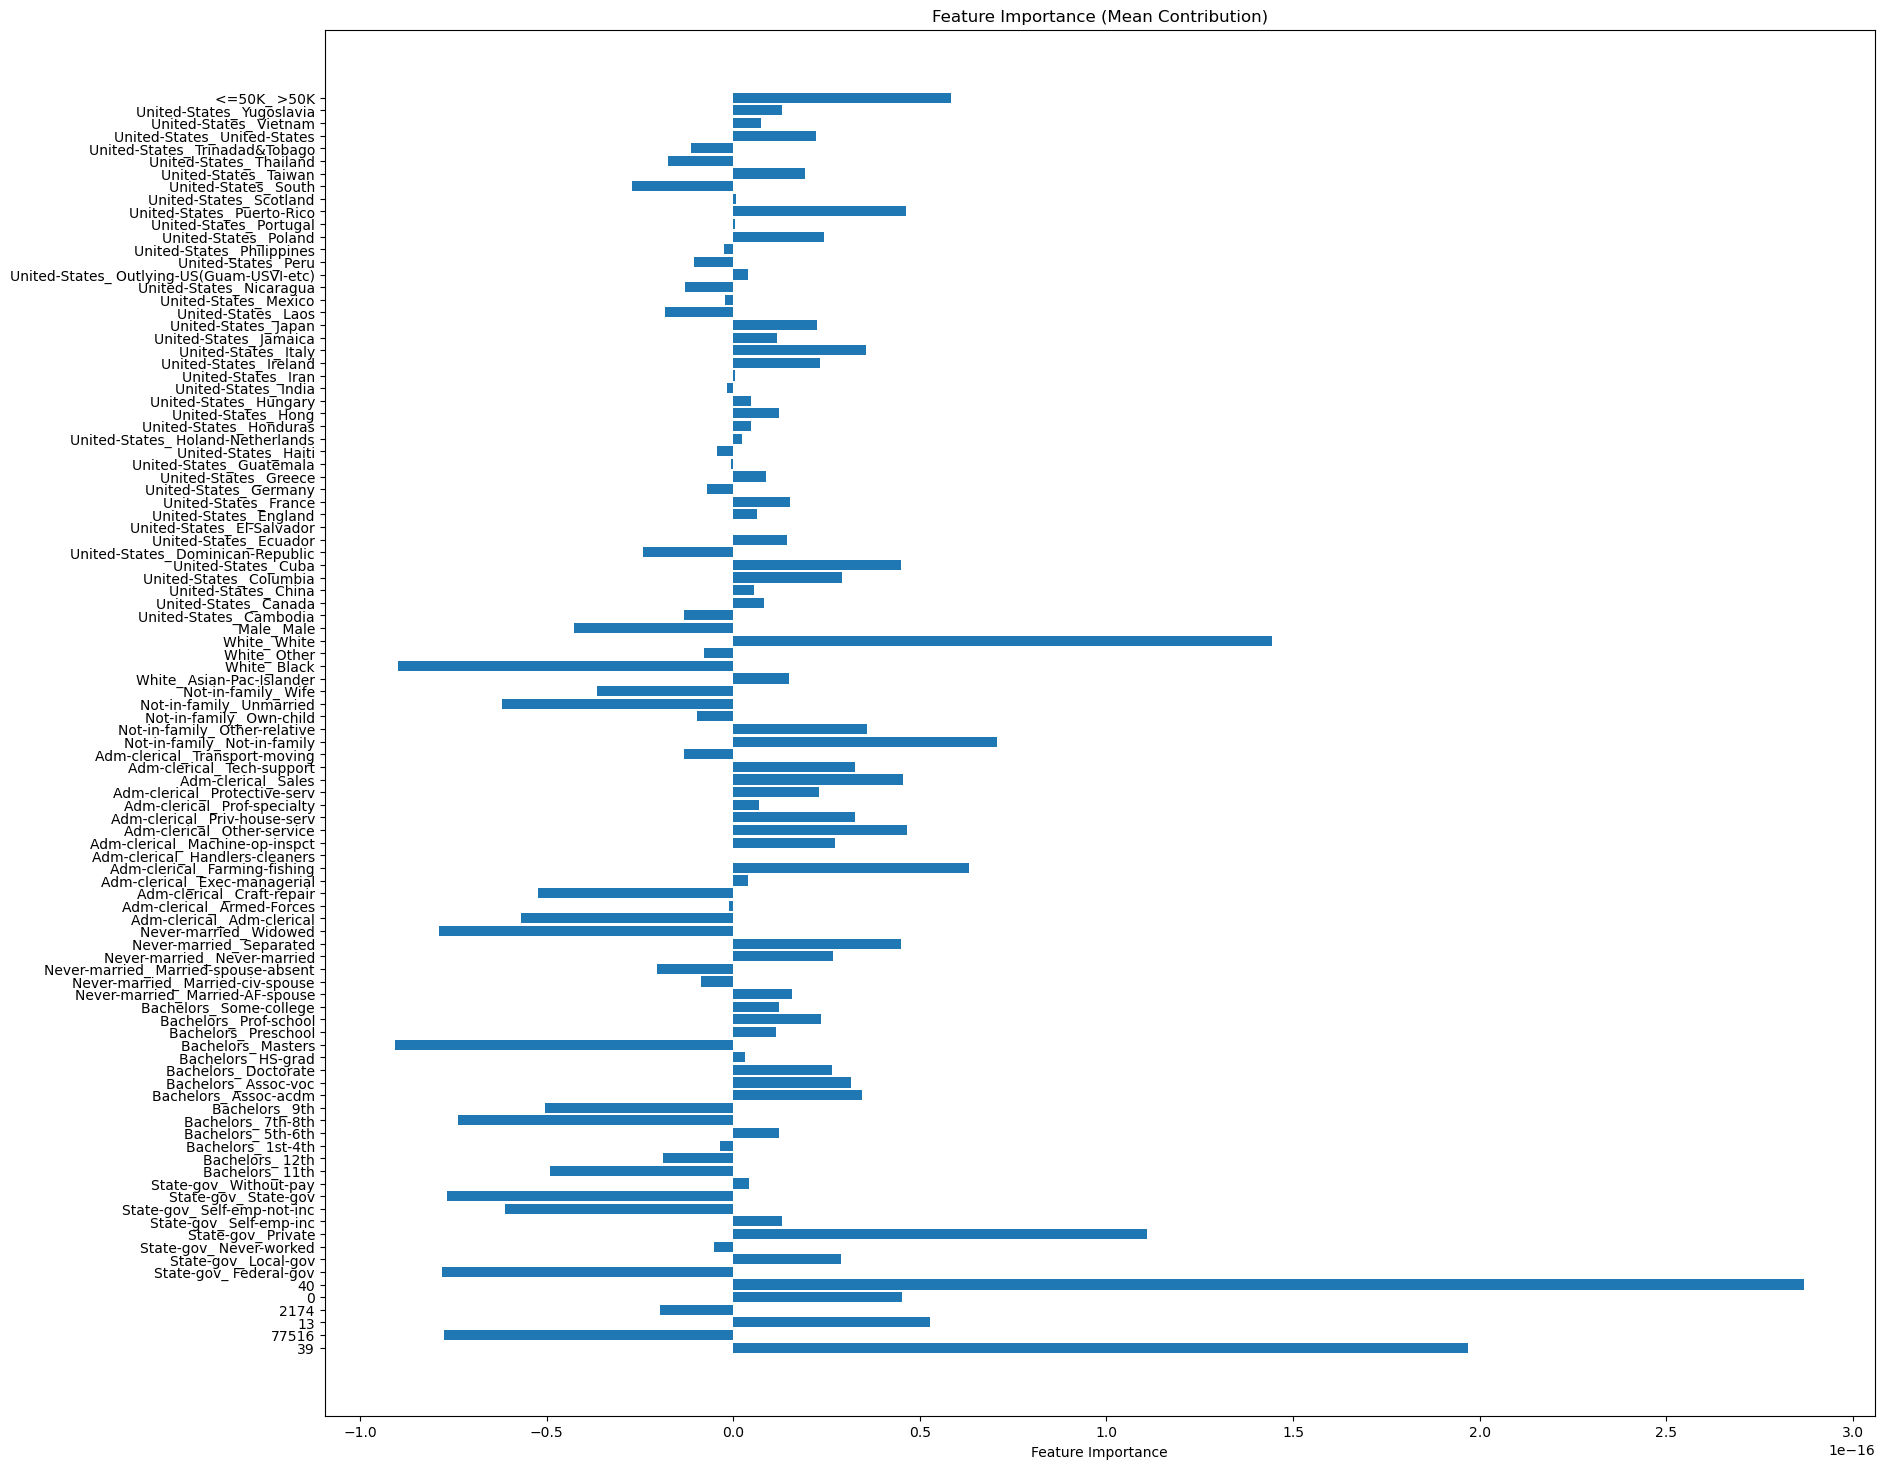

In [35]:
feature_importance = np.mean(X_scaled, axis=0)
features = X.columns

plt.figure(figsize=(20, 18))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Mean Contribution)')
plt.show()

In [36]:
print(list(adult_df_encoded.columns))

['39', '77516', '13', '2174', '0', '40', 'State-gov_ Federal-gov', 'State-gov_ Local-gov', 'State-gov_ Never-worked', 'State-gov_ Private', 'State-gov_ Self-emp-inc', 'State-gov_ Self-emp-not-inc', 'State-gov_ State-gov', 'State-gov_ Without-pay', 'Bachelors_ 11th', 'Bachelors_ 12th', 'Bachelors_ 1st-4th', 'Bachelors_ 5th-6th', 'Bachelors_ 7th-8th', 'Bachelors_ 9th', 'Bachelors_ Assoc-acdm', 'Bachelors_ Assoc-voc', 'Bachelors_ Bachelors', 'Bachelors_ Doctorate', 'Bachelors_ HS-grad', 'Bachelors_ Masters', 'Bachelors_ Preschool', 'Bachelors_ Prof-school', 'Bachelors_ Some-college', 'Never-married_ Married-AF-spouse', 'Never-married_ Married-civ-spouse', 'Never-married_ Married-spouse-absent', 'Never-married_ Never-married', 'Never-married_ Separated', 'Never-married_ Widowed', 'Adm-clerical_ Adm-clerical', 'Adm-clerical_ Armed-Forces', 'Adm-clerical_ Craft-repair', 'Adm-clerical_ Exec-managerial', 'Adm-clerical_ Farming-fishing', 'Adm-clerical_ Handlers-cleaners', 'Adm-clerical_ Machine